# CardioGood Fitness Market Research
We have been tasked by the market research team to identify trends in customers who purchased various treadmill models from CardioGood Fitness during a 3 month period. Our aim is to determine what, if any, factors customers have in common that suggest what demographic it is meaningful to market towards.

# Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Cleaning
Below we import our data and check its cleanliness.

In [2]:
data_loc = 'data/CardioGoodFitness.csv'
cardioGood = pd.read_csv(data_loc)
print(cardioGood.info())
cardioGood.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
print(cardioGood.Product.unique())
print(cardioGood.Gender.unique())
print(cardioGood.MaritalStatus.unique())
print(cardioGood.Fitness.unique())

['TM195' 'TM498' 'TM798']
['Male' 'Female']
['Single' 'Partnered']
[4 3 2 1 5]


In [4]:
print(cardioGood.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


Our data appears to be clean so we can move on to our exploratory analysis.

# Exploratory Data Analysis
We begin by plotting the Fitness level, Marital status, Uses per week, Gender, and miles traveled of our purchasers to see if any trends between models emerge.

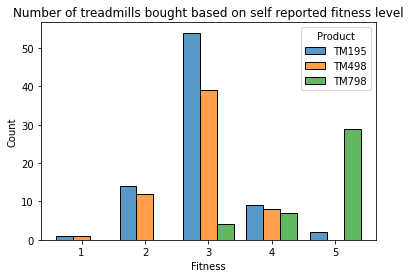

In [5]:
sns.histplot(data=cardioGood, x='Fitness', hue='Product',bins=5,multiple='dodge',discrete=True,shrink=.8)
plt.title('Number of treadmills bought based on self reported fitness level')
plt.show()

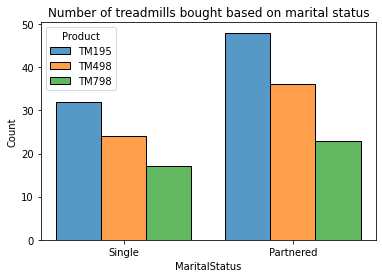

In [6]:
sns.histplot(data=cardioGood, x='MaritalStatus', hue='Product',bins=2,multiple='dodge',discrete=True,shrink=.8)
plt.title('Number of treadmills bought based on marital status')
plt.show()

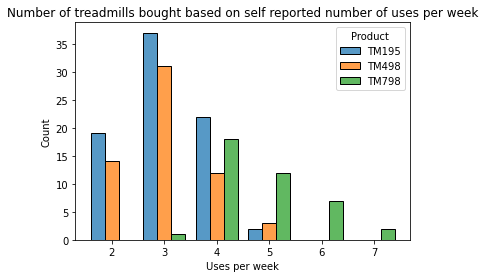

In [7]:
sns.histplot(data=cardioGood, x='Usage', hue='Product',bins=6,multiple='dodge',discrete=True,shrink=.8)
plt.title('Number of treadmills bought based on self reported number of uses per week')
plt.xlabel('Uses per week')
plt.show()

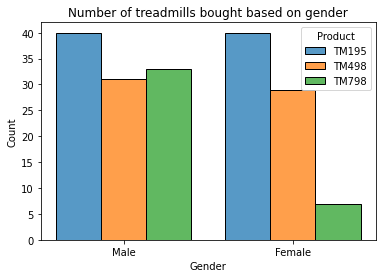

In [8]:
sns.histplot(data=cardioGood, x='Gender', hue='Product',bins=6,multiple='dodge',discrete=True,shrink=.8)
plt.title('Number of treadmills bought based on gender')
plt.show()

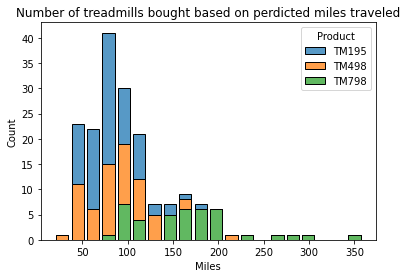

In [9]:
sns.histplot(data=cardioGood, x='Miles', hue='Product',multiple='stack',shrink=.8)
plt.title('Number of treadmills bought based on perdicted miles traveled')
plt.show()

We can see that up to this point, their appears to be a stark difference between customers who purchase the TM798 versus those who purchase a different model. They appear to have a higher self reported fitness level and plan to use their treadmill more times a week than customers who purchased another model as well as being mostly male. Martial status seems to have little effect on which model was purchased, though more of our customers are partnered than single.

# Buying the TM798 versus other models
Considerably more men buy the TM798 than women do. It might be easy to assume that men are more likely to buy the TM798 but we want to ensure we aren't mixing correlation with causation. Is this based entirely on gender or is their some other factor that explains the disparity? We first check to see if age range produces a noteable difference in TM798 vs the other two models.

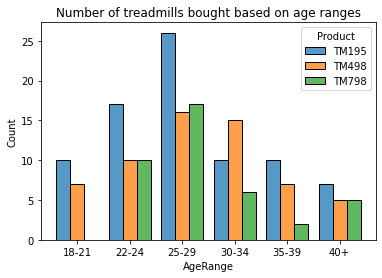

In [10]:
ages = [(cardioGood['Age']<=21),(cardioGood['Age']>21) & (cardioGood['Age']<=24),(cardioGood['Age']>24) & (cardioGood['Age']<=29),(cardioGood['Age']>29) & (cardioGood['Age']<=34),(cardioGood['Age']>34) & (cardioGood['Age']<=39),(cardioGood['Age']>39)]
ageRanges = ['18-21','22-24','25-29','30-34','35-39','40+']
cardioGood['AgeRange'] = np.select(ages,ageRanges)
sns.histplot(data=cardioGood, x='AgeRange', hue='Product',bins=6,multiple='dodge',discrete=True,shrink=.8)
plt.title('Number of treadmills bought based on age ranges')
plt.show()

Age does not appear to be a determining factor in which model is purchased. Given that we have seen a disparity between genders, we check what other factors gender relates to. We plot both Income and Fitness level split by gender to see if we find any notable differences.

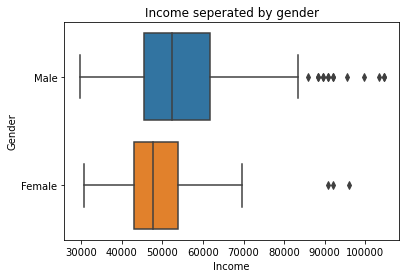

In [11]:
sns.boxplot(data=cardioGood,x='Income',y='Gender')
plt.title('Income seperated by gender')
plt.show()

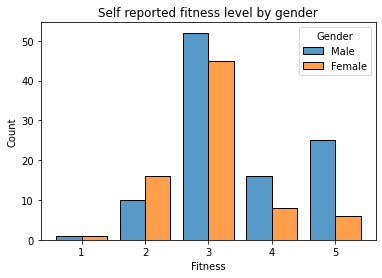

In [12]:
sns.histplot(data=cardioGood,x='Fitness',hue='Gender',discrete='True',multiple='dodge',shrink=.8,bins=6)
plt.title('Self reported fitness level by gender')
plt.show()

We can see that while men do appear to report slightly higher fitness levels than women, it doesn't seem to be a large enough difference to explain why so many more men purchase the TM798 than women. It is worth noting that our male customers do appear to make slightly more money than our female customers. We graph income vs product purchased to see if this could be the difference we are looking for.

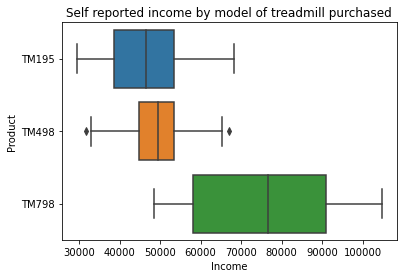

In [13]:
sns.boxplot(data=cardioGood,x='Income',y='Product')
plt.title('Self reported income by model of treadmill purchased')
plt.show()

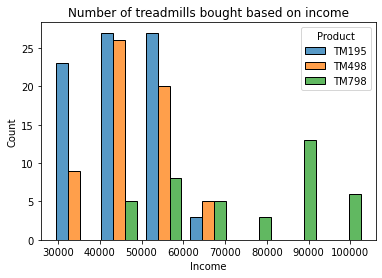

In [14]:
sns.histplot(data=cardioGood, x='Income', hue='Product',multiple='dodge',shrink=.8,bins=7)
plt.title('Number of treadmills bought based on income')
plt.show()

# Income over gender
It has become clear that while it may have first looked as though gender was a significant predictor of which model would be purchased, income, and the income gap between men and women in our data set, appear to be a more significant predictor of which version of treadmill will be purchased.

# Conclusion
We can break our marketing focus into two steps, the first step is who to market our treadmills to generally, the second is which treadmills of the three in our product line to market to sub-groups of our initial marketing group.

Generally we should be marketing our treadmills towards individuals in their early 20s to early 30s with a focus on the late 20s. We generally market towards those individuals who plan to use their treadmills 3-5 times per week and who plan to travel around 100 miles per week on their treadmill. There is a slight preference towards married individuals.

Within this group, the TM798 is better off being marketed towards people who make over $60,000 a year and who view themselves as more fit, with a self reported fitness level of 4 or 5. There is a slight bias towards men for the TM798, but it is likely explained by the income inequality present for women vs men.

The TM195 and TM498 are best off marketed towards those individuals who fall into the general catagory but are below the fitness and income bars needed for the TM798 to be worth marketing. Noteable the TM195 and TM498 seem to serve the same demographics. It is our advice that one of these models be removed from marketing so as not to split market focus between two products. Generally more of the TM195 have been bought than TM498 so it may be advisable to significantly reduce or eliminate the marketing of the TM498.